In [1]:
import pandas as pd
import ast
import requests
import numpy as np

In [5]:
endangeredSpecies = pd.read_csv('endangeredAmphibiaSpecies.csv')
endangeredSpecies.head()

,identificacion,nombre_cientifico,reino,filo,clase,orden,familia,genero,epiteto_especifico,estado_taxonomico,estado_de_amenaza,coordenadas,location_info,display_name,town,state_district,country
0,2431315,Bolitoglossa capitana,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,capitana,Válido,CR,"[(4.53148, -74.336), (4.53148, -74.336), (4.53...","{'place_id': 298208485, 'licence': 'Data © Ope...","Granada, Sumapaz, RAP (Especial) Central, Colo...",Granada,Sumapaz,Colombia
1,9338198,Bolitoglossa guaneae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,guaneae,Válido,VU,"[(5.617806, -73.956917), (5.617694, -73.956806...","{'place_id': 298487144, 'licence': 'Data © Ope...","Llano Grande, Pauna, Occidente, Boyacá, RAP (E...",NaN,Occidente,Colombia
2,2431289,Bolitoglossa hiemalis,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hiemalis,Válido,VU,"[(4.063167, -76.499361), (4.063167, -76.499361...","{'place_id': 298065881, 'licence': 'Data © Ope...","Riofrío, Centro, Valle del Cauca, RAP Pacífico...",NaN,Centro,Colombia
3,2431296,Bolitoglossa hypacra,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hypacra,Válido,EN,"[(6.453389, -76.099083), (6.453389, -76.099083...","{'place_id': 298122804, 'licence': 'Data © Ope...","Sendero a Campanas, Urrao, Suroeste, Antioquia...",Urrao,Suroeste,Colombia
4,9577531,Bolitoglossa leandrae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,leandrae,Válido,CR,"[(4.86, -73.26), (4.86, -73.26), (4.15, -73.65)]","{'place_id': 298066345, 'licence': 'Data © Ope...","Marginal de la Selva, Santa María, Neira, Boya...",Santa María,Neira,Colombia


In [47]:
endangeredSpecies['coordenadas'] = endangeredSpecies['coordenadas'].apply(ast.literal_eval)

In [48]:
endangeredSpecies['coordenadas'] = endangeredSpecies['coordenadas'].apply(lambda x: np.nan if x == [] else x)

In [49]:
endangeredSpecies['coordenadas'].isna().sum()

91

In [58]:
# Your OpenWeatherMap API key
api_key = '7df4939df5a50499f94d221c6dcd7595'

# Function to get weather data from OpenWeatherMap
def get_weather_data(lat, lon, api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"
    try:
        weather_response = requests.get(weather_url)
        weather_response.raise_for_status()
        weather_data = weather_response.json()
        return weather_data['main']['temp']
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

# Process each row in the DataFrame
def process_coordinates(row, api_key):
    coordinates = ast.literal_eval(row['coordenadas'])
    temps = []
    for lat, lon in coordinates:
        temperature = get_weather_data(lat, lon, api_key)
        if temperature is not None:
            temps.append(temperature)
    if temps:
        average_temp = sum(temps) / len(temps)
    else:
        average_temp = None
    return average_temp

# Main function to add temperature column
def add_temperature_column(df, api_key):
    df['temperature'] = df.apply(lambda row: process_coordinates(row, api_key), axis=1)
    return df

# Add temperature column to the DataFrame
endangeredSpecies = add_temperature_column(endangeredSpecies, api_key)

print(endangeredSpecies)

     identificacion         nombre_cientifico     reino      filo     clase  \
0           2431315     Bolitoglossa capitana  Animalia  Chordata  Amphibia   
1           9338198      Bolitoglossa guaneae  Animalia  Chordata  Amphibia   
2           2431289     Bolitoglossa hiemalis  Animalia  Chordata  Amphibia   
3           2431296      Bolitoglossa hypacra  Animalia  Chordata  Amphibia   
4           9577531     Bolitoglossa leandrae  Animalia  Chordata  Amphibia   
..              ...                       ...       ...       ...       ...   
283         2428321  Hyloscirtus torrenticola  Animalia  Chordata  Amphibia   
284        10050363          Agalychnis lemur  Animalia  Chordata  Amphibia   
285        10736342     Callimedusa perinesos  Animalia  Chordata  Amphibia   
286         2430888   Epicrionops columbianus  Animalia  Chordata  Amphibia   
287         2430884       Epicrionops parkeri  Animalia  Chordata  Amphibia   

           orden          familia        genero epi

In [61]:
endangeredSpecies.to_csv('endangeredAmphibian.csv')

In [65]:
# Your OpenWeatherMap API key
api_key = '7df4939df5a50499f94d221c6dcd7595'

# Function to get weather data from OpenWeatherMap
def get_weather_data(lat, lon, api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"
    try:
        weather_response = requests.get(weather_url)
        weather_response.raise_for_status()
        weather_data = weather_response.json()
        return weather_data['main']['humidity']
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

# Process each row in the DataFrame
def process_coordinates(row, api_key):
    coordinates = ast.literal_eval(row['coordenadas'])
    temps = []
    for lat, lon in coordinates:
        temperature = get_weather_data(lat, lon, api_key)
        if temperature is not None:
            temps.append(temperature)
    if temps:
        average_temp = sum(temps) / len(temps)
    else:
        average_temp = None
    return average_temp

# Main function to add temperature column
def add_temperature_column(df, api_key):
    df['humidity'] = df.apply(lambda row: process_coordinates(row, api_key), axis=1)
    return df

# Add temperature column to the DataFrame
endangeredSpecies = add_temperature_column(endangeredSpecies, api_key)

print(endangeredSpecies)

     identificacion         nombre_cientifico     reino      filo     clase  \
0           2431315     Bolitoglossa capitana  Animalia  Chordata  Amphibia   
1           9338198      Bolitoglossa guaneae  Animalia  Chordata  Amphibia   
2           2431289     Bolitoglossa hiemalis  Animalia  Chordata  Amphibia   
3           2431296      Bolitoglossa hypacra  Animalia  Chordata  Amphibia   
4           9577531     Bolitoglossa leandrae  Animalia  Chordata  Amphibia   
..              ...                       ...       ...       ...       ...   
283         2428321  Hyloscirtus torrenticola  Animalia  Chordata  Amphibia   
284        10050363          Agalychnis lemur  Animalia  Chordata  Amphibia   
285        10736342     Callimedusa perinesos  Animalia  Chordata  Amphibia   
286         2430888   Epicrionops columbianus  Animalia  Chordata  Amphibia   
287         2430884       Epicrionops parkeri  Animalia  Chordata  Amphibia   

           orden          familia        genero epi

In [66]:
endangeredSpecies.to_csv('endangeredAmphibian.csv')

In [67]:
endangeredSpecies['humidity'].describe()

count    197.000000
mean      95.289695
std        4.053146
min       81.714286
25%       93.714286
50%       96.739130
75%       98.116279
max      100.000000
Name: humidity, dtype: float64

In [68]:
endangeredSpecies['humidity'].isna().sum( )

91

In [72]:
endangeredSpecies.tail()

,identificacion,nombre_cientifico,reino,filo,clase,orden,familia,genero,epiteto_especifico,estado_taxonomico,estado_de_amenaza,coordenadas,location_info,display_name,town,state_district,country,temperature,humidity
283,2428321,Hyloscirtus torrenticola,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyloscirtus,torrenticola,Válido,VU,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,10050363,Agalychnis lemur,Animalia,Chordata,Amphibia,Anura,Phyllomedusidae,Agalychnis,lemur,Válido,CR,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,10736342,Callimedusa perinesos,Animalia,Chordata,Amphibia,Anura,Phyllomedusidae,Callimedusa,perinesos,Válido,EN,"[(6.963991, -75.417924), (7.163124, -75.439696)]","{'place_id': 269678686, 'licence': 'Data © Ope...","Calle 21, Barrio Centro, Yarumal, Norte, Antio...",Yarumal,Norte,Colombia,15.820000,98.500000
286,2430888,Epicrionops columbianus,Animalia,Chordata,Amphibia,Gymnophiona,Rhinatrematidae,Epicrionops,columbianus,Válido,EN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2430884,Epicrionops parkeri,Animalia,Chordata,Amphibia,Gymnophiona,Rhinatrematidae,Epicrionops,parkeri,Válido,VU,"[(5.902194, -75.190444), (5.902194, -75.190444...","{'place_id': 269699366, 'licence': 'Data © Ope...","El Porvenír, El Carmen de Viboral, Oriente, An...",NaN,Oriente,Colombia,19.794444,98.222222


In [73]:
endangeredSpecies.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_19472\2121786686.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  endangeredSpecies.corr()


,identificacion,temperature,humidity
identificacion,1.000000,0.132281,-0.010362
temperature,0.132281,1.000000,-0.034141
humidity,-0.010362,-0.034141,1.000000


In [74]:
endangeredSpecies.head()

,identificacion,nombre_cientifico,reino,filo,clase,orden,familia,genero,epiteto_especifico,estado_taxonomico,estado_de_amenaza,coordenadas,location_info,display_name,town,state_district,country,temperature,humidity
0,2431315,Bolitoglossa capitana,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,capitana,Válido,CR,"[(4.53148, -74.336), (4.53148, -74.336), (4.53...","{'place_id': 298208485, 'licence': 'Data © Ope...","Granada, Sumapaz, RAP (Especial) Central, Colo...",Granada,Sumapaz,Colombia,13.892222,84.111111
1,9338198,Bolitoglossa guaneae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,guaneae,Válido,VU,"[(5.617806, -73.956917), (5.617694, -73.956806...","{'place_id': 298487144, 'licence': 'Data © Ope...","Llano Grande, Pauna, Occidente, Boyacá, RAP (E...",NaN,Occidente,Colombia,17.191471,95.705882
2,2431289,Bolitoglossa hiemalis,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hiemalis,Válido,VU,"[(4.063167, -76.499361), (4.063167, -76.499361...","{'place_id': 298065881, 'licence': 'Data © Ope...","Riofrío, Centro, Valle del Cauca, RAP Pacífico...",NaN,Centro,Colombia,6.780909,97.000000
3,2431296,Bolitoglossa hypacra,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hypacra,Válido,EN,"[(6.453389, -76.099083), (6.453389, -76.099083...","{'place_id': 298122804, 'licence': 'Data © Ope...","Sendero a Campanas, Urrao, Suroeste, Antioquia...",Urrao,Suroeste,Colombia,5.942759,97.034483
4,9577531,Bolitoglossa leandrae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,leandrae,Válido,CR,"[(4.86, -73.26), (4.86, -73.26), (4.15, -73.65)]","{'place_id': 298066345, 'licence': 'Data © Ope...","Marginal de la Selva, Santa María, Neira, Boya...",Santa María,Neira,Colombia,19.136667,95.000000


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='temperature', ylabel='humidity'>

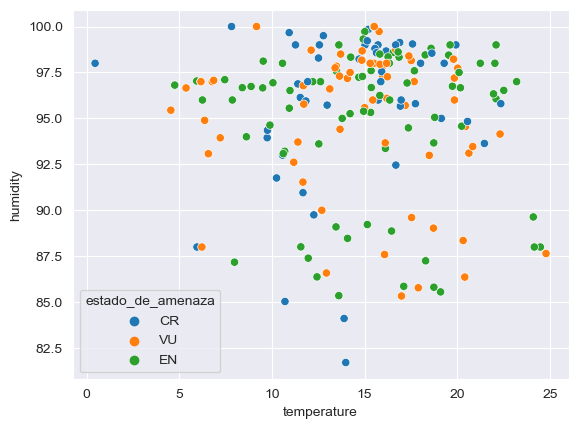

In [78]:
sns.scatterplot(x=endangeredSpecies['temperature'], y=endangeredSpecies['humidity'], hue=endangeredSpecies['estado_de_amenaza'])

C:\Users\USER\AppData\Local\Temp\ipykernel_19472\2490530476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = endangeredSpecies.corr()


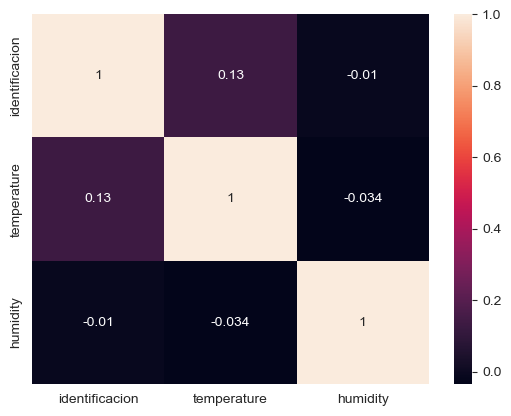

In [79]:
corr_matrix = endangeredSpecies.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
# Function to get elevation data from Open Elevation API
def get_elevation_data(lat, lon):
    elevation_url = "https://api.open-elevation.com/api/v1/lookup"
    params = {
        'locations': f"{lat},{lon}"
    }
    try:
        elevation_response = requests.get(elevation_url, params=params)
        elevation_response.raise_for_status()
        elevation_data = elevation_response.json()
        if 'results' in elevation_data and len(elevation_data['results']) > 0:
            return elevation_data['results'][0]['elevation']
        else:
            print("No elevation data found")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching elevation data: {e}")
        return None

# Process each row in the DataFrame
def process_coordinates(row):
    coordinates = ast.literal_eval(row['coordenadas'])
    elevations = []
    for lat, lon in coordinates:
        elevation = get_elevation_data(lat, lon)
        if elevation is not None:
            elevations.append(elevation)
    if elevations:
        average_elevation = sum(elevations) / len(elevations)
    else:
        average_elevation = None
    return average_elevation

# Main function to add elevation column
def add_elevation_column(df):
    df['average_elevation'] = df.apply(lambda row: process_coordinates(row), axis=1)
    return df

# Add elevation column to the DataFrame
endangeredSpecies = add_elevation_column(endangeredSpecies)

print(endangeredSpecies)


Error fetching elevation data: 504 Server Error: Gateway Time-out for url: https://api.open-elevation.com/api/v1/lookup?locations=4.53148%2C-74.336
Error fetching elevation data: 504 Server Error: Gateway Time-out for url: https://api.open-elevation.com/api/v1/lookup?locations=4.53148%2C-74.336
Error fetching elevation data: 504 Server Error: Gateway Time-out for url: https://api.open-elevation.com/api/v1/lookup?locations=4.53148%2C-74.336
Error fetching elevation data: 504 Server Error: Gateway Time-out for url: https://api.open-elevation.com/api/v1/lookup?locations=4.53148%2C-74.336
Error fetching elevation data: 504 Server Error: Gateway Time-out for url: https://api.open-elevation.com/api/v1/lookup?locations=4.53148%2C-74.336


KeyboardInterrupt: 

In [4]:
endangeredSpecies

,species,coordenadas,average_elevation
0,species1,"[(39.7392, -104.9903), (40.7128, -74.0060)]",827.0
1,species2,"[(34.0522, -118.2437), (37.7749, -122.4194)]",59.0
